<h1><center><font color=#086A87>PEC 1. Entornos de análisis de datos Python - Máster Internet Of the Things</font></h1>
<img src="http://atc2.aut.uah.es/~rico/index_archivos/logo_uah_sin_fondo.gif" width="30%" height="30%" >

<h1> Analizando los accidentes aeronáuntocos registrados por la NTSB </h1>
<FONT SIZE = 4><em> Por Juan Cristóbal García Godoy en Madrid, Enero de 2018 </em></font>
<br>
<br>

<body>
El objetivo principal de este notebook es poner en práctica los contenidos estudiados en el módulo de entornos de análisis de datos con Python incliodo en los contenidos del Máster de IoT de la Universidad de Alcalá.
<br>
<br>
Para ello, se ha seleccionado el siguiente dataset de kaggle:
<br>
<br>
https://webcache.googleusercontent.com/search?q=cache:s1garpA2dg0J:https://www.kaggle.com/khsamaha/aviation-accident-database-synopses+&cd=3&hl=es&ct=clnk&gl=es
<br>
<br>
Del que se intentará hacer un breve análisis ayudándonos de un análisis gráfico y exploratorio. Se comentaran todos los pasos seguidos lo mas detallado posible para su fácil comprensión a la hora de su revisión.
<br>
<br>
Este dataset recoge los accidentes aeronáuticos registrados por la 
<a href="https://www.ntsb.gov/Pages/default.aspx">NTSB</a> desde 1962 hasta 2017 e incluye originalmente las siguientes variables:
<br>
<UL type = disk>
    <LI><b>Event.Id:</b> Fecha del accidente
    <LI><b>Investigation.Type:</b> Tipo (Accidente/Incidente)
    <LI><b>Accident.Number:</b> Código de accidente
    <LI><b>Event.Date:</b> Fecha de accidente
    <LI><b>Location:</b> Localización del accidente
    <LI><b>Country:</b> País delaccidente
    <LI><b>Latitude:</b> Latitud
    <LI><b>Longitude:</b> Longitud
    <LI><b>Airport.Code:</b> Código de aeropuerto de partida
    <LI><b>Airport.Name:</b> Aeropuerto de partida
    <LI><b>Injury.Severity:</b> Severidad de los heridos
    <LI><b>Aircraft.Damage:</b> Daños de la aeronave
    <LI><b>Aircraft.Category:</b> Categoría de la aeronave
    <LI><b>Registration.Number:</b> Número de registro del accidente
    <LI><b>Make:</b> Fabricante
    <LI><b>Model:</b> Modelo
    <LI><b>Amateur.Built:</b> Fabricante amateur
    <LI><b>Number.of.Engines:</b> Número de motores
    <LI><b>Engine.Type:</b> Tipo de motor
    <LI><b>FAR.Description:</b> Descripción de a actividad
    <LI><b>Schedule</b> 
    <LI><b>Purpose.of.Flight:</b> Propósito del vuelo
    <LI><b>Air.Carrier:</b> Compañía aérea
    <LI><b>Total.Fatal.Injuries:</b> Total de lesiones fatales (muertes)
    <LI><b>Total.Serious.Injuries</b> Total de lesiones graves
    <LI><b>Total.Minor.Injuries</b> Total de lesiones menores
    <LI><b>Total.Uninjured</b> Total de ilesos
    <LI><b>Weather.Condition</b> Condiciones meteorológicas
    <LI><b>Broad.Phase.of.Flight</b> Fase del vuelo
    <LI><b>Report.Status</b> Estado del reporte
    <LI><b>Publication.Date</b> Fecha de publicación
    
</UL>
    
</body>


<h1>TABLA DE CONTENIDOS</H1>
<br>
<h3>1. Preparando el entrono de trabajo</h3>
<h3>2. Limpieza de valores perdidos "Missing values" y prparación del data frame</h3>
<h3>3. Analizando los accidentes</h3>
<br>
<UL>
<h4>3.1 Accidentes vs Incidentes</h4>
<h4>3.2 Categorización de los accidentes según el número de tripulantes y severidad</h4>
<h4>3.3 ¿Está relacionado el tipo del vuelo con la severidad del accidente?</h4>
<h4>3.4 ¿Cuál es la aeronave que más siniestros tiene</h4>
<h4>3.5 Relación entre variables, ¿Existe alguna relacióndel tipo de accidente y el número de motores?</h4>
    </UL>
<h3>4. Evolución y análisis de fechas de siniestros</h3>
<br>
<UL>
<h4>4.1 ¿Cuál ha sido la evolución en número de accidentes en los últimos años?</h4>
<h4>4.2 Relación entre el accidente y las fechas( meses y días de la semana)</h4>
    </UL>
<h3>5. ¿En que fase del vuelo es más probable el accidente?¿Cómo influyen las condiciones climatológicas?</h3>
<h3>6. Conclusiones finales y puntos de mejora</h3>

<h2><a id="#df"></a>1. Preparando el entrono de trabajo </h2>

<body>
    <br>
    En primer lugar vamos a importar los módulos y librerías  que vamos a necesitar para hacer el análisis. Cabe destacar que estamos escribiendo códico usando la verison de Python 3.x:
</body>
    

In [57]:
import pandas as pd                   # Importamos pandas para trabajar con el dataset
import numpy as np                    # Importamos numpy para algunas operaciones con vectores
from IPython.display import display   # Vamos a necesitar display para visualizar varias tablas al mismo tiempo
import calendar                       # La emplearemos para el trabajo con fechas
import matplotlib as mpl              # Importamos la librería matplotlib para graficar nuestros resultados
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns       # Importamos también seaborn para porbar con otra biblioteca alternativa a matplotlib 
# Comando mágico para visualizar los plosts de matplotlib sin necesidad de show()
%matplotlib inline          
plt.style.use('ggplot')     # Meramente estético, para usar el entorno ggplot en matpotlib

Este espacio lo vamos a reservar para definir funciones que nos faciliten el análisis, la idea es escribirlas todas en la misma entrada para tenerlas organizadas y no sobrecargar el análisis:

In [58]:
def removeAterParenthesis(string):
    return string.split("(")[0].strip()       # Vamos a necesitar esta función más adelante, básicamente devuelve
                                              # la cadena después del paréntesis con strip()

# Función para obtener la correlación entre las variables numéricas

def plot_correlation_map( df ):               # Esta función no es mía, la he tomado de kaggle, de uno de los análisis 
                                              # del titanic (mas alante detallo el link). Baśicamente calucla la 
    corr = df.corr()                          # correlación entre las variables numéricas del dataset y la grafica
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
#Funcion para reparar losvalores perdidos del número de motores a partir del modelo

def fix_number_of_engines(df, engine_variable, model_variable, noe, m):    
    if noe >= 0:
        return noe
    else:
        r = np.round(df[engine_variable][df[model_variable]==m].mean())
        return r


#Funcion para reparar la categoría  o el tipo de otor de la aeronave a partir del modelo

def fix_aircraft_missings(df, variable, model_vaiable, cat, model):
    if type(cat) == str:
        return cat
    else:
        e = (df[variable][df[model_vaiable]==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'

Comencemos por cargar y visulaizar el dataset, cabe indicar que es necesario esfecificar el charset para poder cargar el csv. En este caso tenemos una codificación ISO-8859-1. Especificamos también el separador:

In [59]:
vuelos = pd.read_csv('AviationData.csv',sep=',', header=0, encoding = "ISO-8859-1")

In [60]:
vuelos.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20171230X01728,Accident,WPR18LA058,2017-12-29,"San Bernardino, CA",United States,34.091666,-117.247777,SBD,SAN BERNARDINO INTL,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,LANDING,Preliminary,2018-01-08
1,20171229X23639,Accident,GAA18CA094,2017-12-28,"Spearfish, SD",United States,44.484722,-103.788055,SPF,BLACK HILLS-CLYDE ICE FIELD,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-01-09
2,20180102X10253,Accident,CEN18LA064,2017-12-28,"Paulding, OH",United States,41.188889,-84.708056,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,CRUISE,Preliminary,2018-01-04
3,20171227X12320,Accident,GAA18CA096,2017-12-27,"Upper Lake, CA",United States,39.443055,-122.960278,1Q5,NaN,...,Personal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,2018-01-08
4,20171228X35517,Accident,CEN18LA062,2017-12-27,"Michigan City, IN",United States,41.695277,86.825556,MGC,Michigan City Municipal Airpor,...,Positioning,NaN,NaN,NaN,NaN,2.0,VMC,LANDING,Preliminary,2018-01-08


Vemos el tipo de variable con las que vamos a trabajar:

In [61]:
vuelos.info() #algo de información del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81013 entries, 0 to 81012
Data columns (total 31 columns):
Event.Id                  81013 non-null object
Investigation.Type        81013 non-null object
Accident.Number           81013 non-null object
Event.Date                81013 non-null object
Location                  80937 non-null object
Country                   80506 non-null object
Latitude                  27309 non-null float64
Longitude                 27300 non-null float64
Airport.Code              45761 non-null object
Airport.Name              48541 non-null object
Injury.Severity           81013 non-null object
Aircraft.Damage           78505 non-null object
Aircraft.Category         24225 non-null object
Registration.Number       77679 non-null object
Make                      80940 non-null object
Model                     80911 non-null object
Amateur.Built             80404 non-null object
Number.of.Engines         76674 non-null float64
Engine.Type             

¡Tenemos algún problema! En primer lugar, el nombre de las variables tiene un '.' como separador, esto no es inconveniente pero por comodidad (esto es personal) lo ideal sería quitarlo para luego acceder a las variables. Por otro lado vemos que tenemos la variable de fechas reconocida como objeto y no como datetime. Esto es algo que repararemos también en el siguiente apartado para poder trabajar con fechas.

Ahora, veamos la cantidad de valores perdidos que tenemos en nuestro datafrmae para ver cómo podemos trabajr con las variables y cuáles podemos usar para nuestro análisis. Para ello, nos ayudaremos de "is.null()":

In [62]:
vuelos.isnull().sum() #Observamos muchos valores perdidos

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     76
Country                     507
Latitude                  53704
Longitude                 53713
Airport.Code              35252
Airport.Name              32472
Injury.Severity               0
Aircraft.Damage            2508
Aircraft.Category         56788
Registration.Number        3334
Make                         73
Model                       102
Amateur.Built               609
Number.of.Engines          4339
Engine.Type                3691
FAR.Description           57098
Schedule                  69385
Purpose.of.Flight          4226
Air.Carrier               77003
Total.Fatal.Injuries      24683
Total.Serious.Injuries    27051
Total.Minor.Injuries      25909
Total.Uninjured           13067
Weather.Condition          2413
Broad.Phase.of.Flight      6241
Report.Status                 0
Publication.Date          13735
dtype: i

Como vemos, la cantidad de valores perdidos es considerable,por lo que vermos de que manera podemos solucionar el problema para poder hacer los análisis que tenemos pensados.

<h2> <a id="na"></a>2. Limpieza de valores perdidos "Missing values" y prparación del data frame </h2>

En primer lugar vamos a eliminar las variables que no vamos a necesitar en el análisis y a renombrar el resto para quitar el "." del separador de modo que luego nos sea más fácil accder a las variables.

In [63]:
vuelos.drop(["Event.Id", "Accident.Number", "Airport.Code", "Airport.Name", "Registration.Number", 
             "FAR.Description", "Schedule", "Air.Carrier", "Report.Status", "Publication.Date"], 
             axis = 1, inplace = True)

vuelos = vuelos.rename(index = str, columns = {"Investigation.Type" : "InvestigationType", "Event.Date" : "EventDate", 
                                               "Injury.Severity" : "InjurySeverity", "Aircraft.Damage" : "AircraftDamage", 
                                               "Aircraft.Category" : "AircraftCategory", "Amateur.Built" : "AmateurBuilt",
                                               "Number.of.Engines" : "Engines", "Engine.Type" : "EngineType",
                                               "Purpose.of.Flight" : "Purpose", "Total.Fatal.Injuries" : "FatalInjuries",
                                               "Total.Serious.Injuries" : "SeriousInjuries", "Total.Minor.Injuries" : "MinorInjuries",
                                               "Total.Uninjured" : "Uninjuried", "Weather.Condition" : "Weather", 
                                               "Broad.Phase.of.Flight" : "PhaseOfFlight"})

vuelos.head()

,InvestigationType,EventDate,Location,Country,Latitude,Longitude,InjurySeverity,AircraftDamage,AircraftCategory,Make,...,AmateurBuilt,Engines,EngineType,Purpose,FatalInjuries,SeriousInjuries,MinorInjuries,Uninjuried,Weather,PhaseOfFlight
0,Accident,2017-12-29,"San Bernardino, CA",United States,34.091666,-117.247777,Non-Fatal,Substantial,Airplane,CESSNA,...,No,1.0,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC,LANDING
1,Accident,2017-12-28,"Spearfish, SD",United States,44.484722,-103.788055,Non-Fatal,Substantial,Airplane,PIPER,...,No,1.0,NaN,Personal,NaN,NaN,NaN,1.0,VMC,NaN
2,Accident,2017-12-28,"Paulding, OH",United States,41.188889,-84.708056,Non-Fatal,Substantial,Airplane,PIPISTREL DOO AJDOVSCINA,...,NaN,1.0,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC,CRUISE
3,Accident,2017-12-27,"Upper Lake, CA",United States,39.443055,-122.960278,Unavailable,NaN,Airplane,AEROPRO CZ,...,No,1.0,NaN,Personal,NaN,NaN,NaN,NaN,NaN,NaN
4,Accident,2017-12-27,"Michigan City, IN",United States,41.695277,86.825556,Non-Fatal,Substantial,Airplane,CESSNA,...,No,NaN,NaN,Positioning,NaN,NaN,NaN,2.0,VMC,LANDING


Fijémonos ahora en la variable "InjurySeverity"


In [64]:
vuelos.InjurySeverity.unique()

array(['Non-Fatal', 'Unavailable', 'Fatal(2)', 'Fatal(5)', 'Fatal(1)',
       'Fatal(3)', 'Fatal(11)', 'Fatal(4)', 'Incident', 'Fatal(7)',
       'Fatal(9)', 'Fatal(6)', 'Fatal(39)', 'Fatal(8)', 'Fatal(16)',
       'Fatal(66)', 'Fatal(62)', 'Fatal(23)', 'Fatal(10)', 'Fatal(224)',
       'Fatal(150)', 'Fatal(43)', 'Fatal(162)', 'Fatal(58)', 'Fatal(295)',
       'Fatal(239)', 'Fatal(33)', 'Fatal(50)', 'Fatal(14)', 'Fatal(21)',
       'Fatal(19)', 'Fatal(153)', 'Fatal(127)', 'Fatal(28)', 'Fatal(77)',
       'Fatal(12)', 'Fatal(42)', 'Fatal(157)', 'Fatal(158)', 'Fatal(103)',
       'Fatal(89)', 'Fatal(90)', 'Fatal(152)', 'Fatal(228)', 'Fatal(17)',
       'Fatal(13)', 'Fatal(24)', 'Fatal(88)', 'Fatal(65)', 'Fatal(154)',
       'Fatal(30)', 'Fatal(20)', 'Fatal(40)', 'Fatal(57)', 'Fatal(199)',
       'Fatal(114)', 'Fatal(102)', 'Fatal(96)', 'Fatal(49)', 'Fatal(124)',
       'Fatal(113)', 'Fatal(107)', 'Fatal(117)', 'Fatal(145)', 'Fatal(45)',
       'Fatal(160)', 'Fatal(121)', 'Fatal(15)', 'Fa

Seguramente, nos será mas ácil categorizar esta variable en 'Fatal', 'Non-Fatal' e 'Incident'. Como vemos, en fatal se nos indica entre paréntesis el número de afectados, pero esta información ya está replicada en el dataframe por lo que poco nos aporta.

Vamos a usar la función que nos hemos creado para ello "removeAfterParenthesis" (ver apartado de funciones).

Además vamos a eliminar los "Unavailables" ya que hay muy pocos valores de este grupo.

In [65]:
# Nos apoyamos de removeAterParenthesis (función creada por nosotros) para reparar este problema. Gracias a apply
# de pandas, podemos crearnos todo un vector que y con assign reemplazamos por el original

vuelos = vuelos.assign(InjurySeverity = vuelos.InjurySeverity.apply(removeAterParenthesis))
vuelos.InjurySeverity.value_counts()

Non-Fatal      61291
Fatal          16223
Incident        3268
Unavailable      231
Name: InjurySeverity, dtype: int64

In [66]:
vuelos = vuelos [vuelos ["InjurySeverity"] != "Unavailable"]
vuelos.InjurySeverity.value_counts()

Non-Fatal    61291
Fatal        16223
Incident      3268
Name: InjurySeverity, dtype: int64

Vamos a reparar ahora las variables de número de motores, tipo de motor y tipo de aeronave. Todos estos valores son fácilmente deducibles a partir del modelo de aeronave.

Usaremos las funciones definidas al principio del notebook.

Para programarla me he ayudado del ejemplo expuesto en este dataset:

https://www.kaggle.com/ddmngml/exploring-aviation-data

El tiempo de ejecución es alto por la cantidad de comparaciones que hacemos en esta línea. (Un poco de paciencia...)

In [67]:
# Gracias a la función lambda en combinación con apply, y teniendo en cuenta las funciones creadas, estamos,
# básicamente, creando un vector a partir de los datos equivalentes de dos variables del dataframe (así como lo 
# haríamos con un VLOOKUP de Excel). El proceso es largo, tarda unos 10-15 minutos por la cantidad de iteraciones
# que se hacen sobre el par de vectores.

en_type = vuelos.apply(lambda x: fix_aircraft_missings(vuelos, "EngineType", "Model", 
                                                       x["EngineType"], x["Model"]), axis=1)

aircraft_cat = vuelos.apply(lambda x: fix_aircraft_missings(vuelos, "AircraftCategory", "Model", 
                                                            x["AircraftCategory"], x["Model"]), axis=1)

num_engines = vuelos.apply(lambda x: fix_number_of_engines(vuelos, "Engines", "Model", 
                                                           x["Engines"], x["Model"]), axis=1)

Nos hemos creado tres vectores con los valores perdidos reparadaos para cada una de las tres variables, por lo que ahora nos quedara bicarlas en el dataframe reemplazando a las que había:

In [68]:
# Sobreescribimos las variables que queremos reparar con los valores obtenidos

vuelos = vuelos.assign(AircraftCategory = aircraft_cat)
vuelos = vuelos.assign(EngineType = en_type)
vuelos = vuelos.assign(Engines = num_engines)

In [69]:
vuelos.AircraftCategory.value_counts()

Airplane             63379
Unknown               9109
Helicopter            6626
Glider                 843
Balloon                419
Gyrocraft              178
Weight-Shift            86
Powered Parachute       62
Ultralight              37
Gyroplane               30
Blimp                    7
Powered-Lift             5
Rocket                   1
Name: AircraftCategory, dtype: int64

In [70]:
vuelos.EngineType.value_counts()

Reciprocating       66942
Turbo Shaft          3578
Turbo Prop           3359
Unknown              3250
Turbo Fan            2924
Turbo Jet             704
None                   17
Electric                2
REC, TJ, TJ             2
REC, TJ, REC, TJ        1
Hybrid Rocket           1
REC, ELEC               1
TJ, REC, REC, TJ        1
Name: EngineType, dtype: int64

In [71]:
vuelos.Engines.value_counts()

1.0    65795
2.0    11284
0.0     1687
3.0      548
4.0      482
Name: Engines, dtype: int64

Ups! En esta última variable vemos que hay aeronaves con "0" número de motores. No sabemos si es porque se tienen encuenta aeronaves no tripuladas o por valores perdidos. En cualquier caso como no será objeto de este análisis las aeronaves sin tripulación nos desharemos de esas líneas.

Además, vamos a terminar de rellenar los valores perdidos con la media de los motores para dejar la variable sin ninguno.

In [72]:
#compoletamos el resto de valores perdidos de motores del avión con la media del resto.
#eliminamos los que los valores sean 0 ya que no sabemos si se tratan de aeronaves no motorizadas (no queremos incluirlas)
# en nuestro análisis o de valores perdidios

vuelos = vuelos[vuelos["Engines"]!=0]
vuelos = vuelos.assign(Engines = vuelos.Engines.fillna(np.round((np.mean(vuelos.Engines.dropna())))))

Reparemos ahora los valores perdidos de las columnas deonde se resumen el número de heridos. Vamos a reemplazar en primera instancia los NaN por "0"

In [73]:
# Suponemos que los valores perdidos en el caso de los heridos e ilesos son 0.

vuelos.FatalInjuries.fillna(0, inplace = True)
vuelos.SeriousInjuries.fillna(0, inplace = True)
vuelos.MinorInjuries.fillna(0, inplace = True)
vuelos.Uninjuried.fillna(0, inplace = True)

Ahora, vemos que seguramente nos interese para nuestro análisis agregar una columna con el número de pasajeros total, por lo que vamos a crear una variable "Passengers"

In [74]:
# Usamos assing de Pandaspara crear una nueva variable que nos dé el número de tripulantes como la suma de los heridos
# y los ilesos.

vuelos = vuelos.assign(Passengers = (vuelos.FatalInjuries + vuelos.SeriousInjuries + 
                                     vuelos.MinorInjuries + vuelos.Uninjuried))

vuelos.Passengers.value_counts().sort_index()

0.0        494
1.0      34462
2.0      25522
3.0       7111
4.0       5005
5.0       1585
6.0        900
7.0        450
8.0        250
9.0        174
10.0       156
11.0        91
12.0        78
13.0        58
14.0        59
15.0        41
16.0        55
17.0        26
18.0        49
19.0        30
20.0        33
21.0        32
22.0        20
23.0        15
24.0        18
25.0        18
26.0        16
27.0        21
28.0        13
29.0        16
         ...  
401.0        1
403.0        1
404.0        1
408.0        2
409.0        1
411.0        1
412.0        1
414.0        1
419.0        1
421.0        2
422.0        1
436.0        2
440.0        2
441.0        2
448.0        2
450.0        2
454.0        2
459.0        2
461.0        2
468.0        1
481.0        1
496.0        2
501.0        2
507.0        1
528.0        2
560.0        1
573.0        2
576.0        2
588.0        2
699.0        2
Name: Passengers, Length: 369, dtype: int64

Con esta nueva variable que hemos creado nos damos cuenta de lo siguiente:

Tenemos 494 vuelos con 0 pasajeros, aquí debe de haber un error, por lo que vamos a excluir estos casos del análisis.

Por otro lado también observamos lo siguiente, hay una cantidad considerable de accidentes con un solo pasajero, de dos pasajeros, entre 3 y 50 pasajeros y luego muchos accidentes de hasta 699 pasajeros. Por tanto, ¿por qué no categorizar el accidente según el número de tripulantes?

Hagamos para ello una nueva variable para hacer los 4 subrupos. La llamaremos AircraftSize:

In [75]:
# En la primera línea básicamente estamos eliminando las filas para las que el número de tripulantes es 0.
# Luego con cut, estamos dividiendo el df según el número de tripulantes en los intervalos indicados, a los
# cuales les damos un nombre con labels.

vuelos = vuelos[vuelos["Passengers"]!=0]

vuelos = vuelos.assign(AircraftSize = pd.cut(vuelos.Passengers,[1,2,3,50,np.inf], 
                                             labels = ["A-Crew-member", "2-Crew", "3-50-Crew", ">50-Crew"],
                                             right = False))
vuelos.AircraftSize.value_counts()

A-Crew-member    34462
2-Crew           25522
3-50-Crew        16597
>50-Crew          2020
Name: AircraftSize, dtype: int64

Veamos ahora los valores de las condiciones climatológicas y de las fases del vuelo dónde se produce el accidente:

In [76]:
vuelos.Weather.value_counts()

VMC    70135
IMC     5701
UNK      893
Name: Weather, dtype: int64

In [77]:
vuelos.PhaseOfFlight.value_counts()

LANDING        19126
TAKEOFF        15345
CRUISE         10711
MANEUVERING     9855
APPROACH        7547
TAXI            2357
CLIMB           2261
DESCENT         2153
GO-AROUND       1638
STANDING        1220
UNKNOWN          687
OTHER            147
Name: PhaseOfFlight, dtype: int64

En estos casos no nos interesa borrar las filas de valores perdidos por lo que para repararlo vamos a nombrarlas como desconocido en ambos casos:

In [78]:
vuelos.Weather.fillna("UNK", inplace = True)
vuelos.Weather.value_counts()

VMC    70135
IMC     5701
UNK     2765
Name: Weather, dtype: int64

In [79]:
# Con fillna completamos los missing values con "Unknown". Usamos inplace = True para sobreescribir la memoria del 
# data frame.

# Con replace, dejamos la variable OTHER también ctegorizada como "UNKNOWN"

vuelos.PhaseOfFlight.fillna("UNKNOWN", inplace = True)
vuelos.PhaseOfFlight.replace("OTHER", "UNKNOWN", inplace = True)
vuelos.PhaseOfFlight.value_counts()

LANDING        19126
TAKEOFF        15345
CRUISE         10711
MANEUVERING     9855
APPROACH        7547
UNKNOWN         6388
TAXI            2357
CLIMB           2261
DESCENT         2153
GO-AROUND       1638
STANDING        1220
Name: PhaseOfFlight, dtype: int64

Vamos a seguir el mismo proceso con el resto de variables, salvo las de latitud y longitud, para terminar de reparar nuestro dataframe:

In [80]:
# Con fillna completamos los missing values con "Unknown". Usamos inplace = True para sobreescribir la memoria del 
# data frame.

vuelos.Location.fillna("Unknown", inplace = True)
vuelos.Country.fillna("Unknown", inplace = True)
vuelos.AircraftDamage.fillna("Unknown", inplace = True)
vuelos.Make.fillna("Unknown", inplace = True)
vuelos.Model.fillna("Unknown", inplace = True)
vuelos.AmateurBuilt.fillna("Unknown", inplace = True)
vuelos.Purpose.fillna("Unknown", inplace = True)

Comprobamos ahora que el data frame ha quedado libre de valores perdidos:

In [81]:
vuelos.isnull().sum()

InvestigationType        0
EventDate                0
Location                 0
Country                  0
Latitude             51915
Longitude            51924
InjurySeverity           0
AircraftDamage           0
AircraftCategory         0
Make                     0
Model                    0
AmateurBuilt             0
Engines                  0
EngineType               0
Purpose                  0
FatalInjuries            0
SeriousInjuries          0
MinorInjuries            0
Uninjuried               0
Weather                  0
PhaseOfFlight            0
Passengers               0
AircraftSize             0
dtype: int64

Por último, hagamos una última reparación con el campo fecha (recordemos que no se rconoció con el tipo datetime y lo necesitamos si quermos hacer análisis evolutivos).

In [82]:
vuelos.EventDate = vuelos.EventDate.astype("datetime64[ns]", errors = "raise")

Ahora ya tenemos todo listo para poder empezar a hacer nuestro análisis.

<h2 id="#df"></a>3. Analizando los accidentes</h2>
<h4>3.1 Accidentes vs Incidentes</h3>

En primer lugar, revisemos la diferencia entre un accidente aéreo y un incidente aéreo. Básicamente, un Incidente es parecido a un Accidente, pero sin victimas mortales ni destrozos en la aeronave. Más información en el siguiente enlace:

https://desdelacabinadevuelo.com/2014/01/29/diferencia-entre-accidente-e-incidente-aereo/


Vemos, en primer lugar, que el porcentaje de accidentes con respecto al de incidentes es considerablemente superior, por lo que es fácilmente deducible que es muy seguro que se produzca un accidente ante problemas no deseados en las aeronaves:

In [83]:
summarise_event = 100*vuelos.InvestigationType.value_counts() / len(vuelos.InvestigationType)
summarise_event

Accident    96.4975
Incident     3.5025
Name: InvestigationType, dtype: float64

Ahora veamos, de los accidentes, cuántos de ellos desembocan en víctimas mortales:

In [84]:
summarise_accident =  vuelos.InjurySeverity.value_counts()
summarise_accident

Non-Fatal    59849
Fatal        15999
Incident      2753
Name: InjurySeverity, dtype: int64

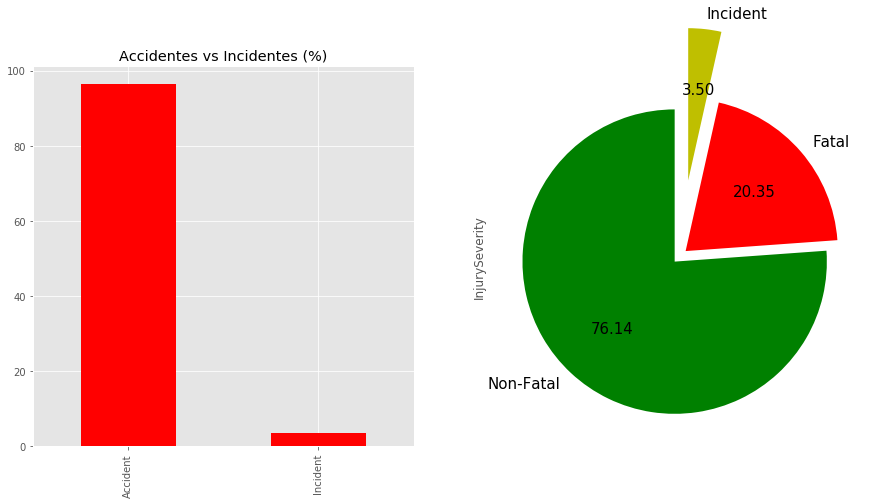

In [85]:
# Gracias a subplots, podemos visualizar várias gráficas en la misma salida generando un "array de plots"
# de las dimensiones que deseemos.

fig, axs = plt.subplots(1,2)

p1 = summarise_event.plot.bar(figsize=(15,7), title = "Accidentes vs Incidentes (%)", color = ["r","g"], 
                              ax = axs[0])

p2 = summarise_accident.plot.pie(autopct = "%.2f", colors = ["g", "r","y"], fontsize=15,
                                 explode=(0.05,0.05,0.5), startangle=90, ax = axs [1])

<h4>3.2 Categorización de los accidentes según el número de tripulantes y severidad</h4>

Vemos que la gran mayoría de los accidentes aeronáuticos recoguidos por la NTSB no desemboca en víctimas motrlaes. (Tengamos en cuenta que no estamos analizando solamente vuelos comerciales).

Vamos a analizar un poco mejor esto, dividiento los accidentes en subgrupos según el número de tripulantes de la aeronave:

InjurySeverity,Fatal,Incident,Non-Fatal
AircraftSize,,,
A-Crew-member,17.2%,0.9%,81.9%
2-Crew,20.9%,1.5%,77.6%
3-50-Crew,27.5%,6.2%,66.3%
>50-Crew,8.0%,50.7%,41.3%


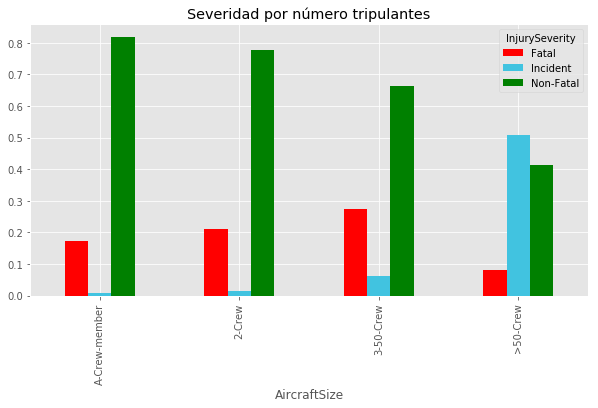

In [86]:
# Python con su función lambda, nos permite operar fácilmente con vectores. Junto con apply de Pandas, en este caso,
# calculamos la media del tipo de accidente en cada caso usando la crosstab.
# Con format,podemos visualizar los valores de una forma más amigable en %.

Injuries_bySize = pd.crosstab(index = vuelos["AircraftSize"], columns = vuelos["InjurySeverity"]).apply(
    lambda r: r/r.sum(), axis = 1)

display(Injuries_bySize.style.format("{:.1%}"))

p3 = Injuries_bySize.plot(kind = "bar", figsize=(10,5), color = ["r","#41C3E0","g"], 
                          title = "Severidad por número tripulantes")

¿Qué observamos aquí? Como vemos, en las naves de más de 50 tripulantes, a mayoría de los sucesos suelen acabar en solo un incidente o a lo sumo en accidente sin víctimas.

Otra conclusión es que en tripulaciones menores a 50 pasajeros el índice de fatalidad aumenta, encontrándoos el mayor de este caso en el grupo de 3 a 50 pasajeros.

Vamos a ver ahora la gravedad y cantidad heridos en cada uno de los grupos:

,FatalInjuries,SeriousInjuries,MinorInjuries,Uninjuried
AircraftSize,,,,
A-Crew-member,5938.0,3374.0,5205.0,19945.0
2-Crew,9466.0,5035.0,7695.0,28848.0
3-50-Crew,16820.0,6169.0,8993.0,53481.0
>50-Crew,13603.0,2085.0,5483.0,290139.0


,FatalInjuries,SeriousInjuries,MinorInjuries,Uninjuried
AircraftSize,,,,
A-Crew-member,17.2%,9.8%,15.1%,57.9%
2-Crew,18.5%,9.9%,15.1%,56.5%
3-50-Crew,19.7%,7.2%,10.5%,62.6%
>50-Crew,4.4%,0.7%,1.8%,93.2%


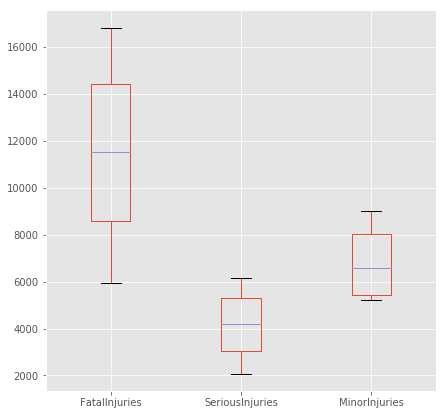

In [87]:
# De nuevo emplemaos la misma técnica, aunque ahora usaremos groupby en lugar de crosstab para agrupar y resumir.
# De nuevo, con lambda, podemos operar sobre todo el vector junto con apply para calcular el %.
# display nos permite visualizar ambas tablas.

Injuries = vuelos[["FatalInjuries", "SeriousInjuries", "MinorInjuries", "Uninjuried", "AircraftSize"]]
Summarise_Injuries = Injuries.groupby("AircraftSize").agg("sum")

display(Summarise_Injuries, Summarise_Injuries.apply(lambda r: r/r.sum(), axis = 1).style.format("{:.1%}"))

p4 = Summarise_Injuries.drop(["Uninjuried"], axis=1).boxplot(figsize= (7, 7) )

Vemos que, (excluyendo los ilesos),la proabilidad de resultar herido de forma fatal (fallecido) predomina sobre el resto.

Vamos a diferenciar ahora entre accidentes con víctimas mortales y accidentes sin fallecidos. Como vemos se cumple la deducción que hacíamos, si el accidente es fatal, la probabilidad de morir es muy alta:

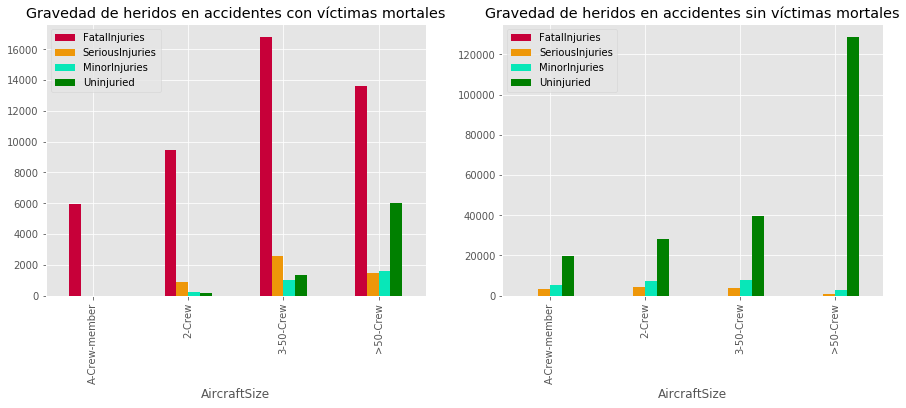

In [88]:
Fatal_Injuries = vuelos[vuelos["InjurySeverity"] == "Fatal"]
Non_Fatal_Injuries = vuelos[vuelos["InjurySeverity"] == "Non-Fatal"]

fig, axs = plt.subplots(1,2)

p5= Fatal_Injuries.groupby("AircraftSize")["FatalInjuries","SeriousInjuries",
                                       "MinorInjuries","Uninjuried"].agg("sum").plot(kind = "bar", 
                                                                                     title = "Gravedad de heridos en accidentes con víctimas mortales",
                                                                                     figsize = (15, 5),
                                                                                     color = ["#C70039","#EE9709","#08E7B8", "g"],
                                                                                     ax = axs[0]
                                                                                    )
p6 = Non_Fatal_Injuries.groupby("AircraftSize")["FatalInjuries","SeriousInjuries",
                                           "MinorInjuries","Uninjuried"].agg("sum").plot(kind = "bar", 
                                                                                     title = "Gravedad de heridos en accidentes sin víctimas mortales",
                                                                                     color = ["#C70039","#EE9709","#08E7B8", "g"],
                                                                                     ax = axs[1]
                                                                                    )


<h4>3.3 ¿Está relacionado el tipo del vuelo con la severidad del accidente?</h4>

Vamos a ver ahora los accidentes e incidentes pero agrupados por el propósito del vuelo. En primer lugar exploremos esta variable:

In [89]:
Aircraft_by_Purpose = pd.crosstab(index = vuelos["Purpose"], columns = vuelos["AircraftSize"], margins=True)
Aircraft_by_Purpose.drop("All").sort_values(by=["All"],ascending=False)

AircraftSize,A-Crew-member,2-Crew,3-50-Crew,>50-Crew,All
Purpose,,,,,
Personal,19477,16108,8801,11,44397
Unknown,2289,1709,4217,1983,10198
Instructional,4020,4632,836,0,9488
Aerial Application,4276,145,15,0,4436
Business,1437,1166,1218,6,3827
Positioning,885,344,294,4,1527
Other Work Use,539,263,273,1,1076
Ferry,517,198,56,1,772
Aerial Observation,166,320,174,1,661


De los resultados, podemos intuir que en el grupo "Unknown" se incluyen los vuelos comerciales ya que están la mayoría del grupo de más de 0 pasajeros. Como tenemos ese valor perdido, vamos a tomar esta deducción como cierta.

In [90]:
Injuries_by_purpose = pd.crosstab(index = vuelos["Purpose"], columns = vuelos["InjurySeverity"])
display(Injuries_by_purpose.sort_values(by=["Fatal"], ascending=False))
display(Injuries_by_purpose.apply(lambda r: r/r.sum(), axis = 1).sort_values(
    by=["Fatal"], ascending=False).style.format("{:.1%}"))

InjurySeverity,Fatal,Incident,Non-Fatal
Purpose,,,
Personal,9475,265,34657
Unknown,2569,2034,5595
Business,1030,104,2693
Instructional,930,122,8436
Aerial Application,462,4,3970
Positioning,371,84,1072
Other Work Use,232,24,820
Aerial Observation,192,2,467
Ferry,163,23,586


InjurySeverity,Fatal,Incident,Non-Fatal
Purpose,,,
Firefighting,45.8%,0.0%,54.2%
Air Race/Show,45.8%,0.8%,53.4%
Skydiving,34.2%,0.6%,65.2%
Glider Tow,30.3%,0.0%,69.7%
Air Drop,30.0%,0.0%,70.0%
Aerial Observation,29.0%,0.3%,70.7%
Business,26.9%,2.7%,70.4%
Executive/Corporate,25.9%,9.5%,64.6%
Public Aircraft,25.6%,3.6%,70.8%


Como podemos observar el número de accidentes fatales es mayor en los que tienen propósito personal, Unknown y Business, pero nos damos cuenta que, en porcentaje, es más común que los accidentes fatales ocurran en las aeronaves apagafuegos, en los Shows aereos o en los aviones para paracaidismo.  

https://en.wikipedia.org/wiki/Aerial_firefighting
http://airrace.redbull.com/es_INT
http://skydiverdriver.blogspot.com.es/p/skydive-aircraft.html

Los vuelos institucionales son los que menos riesgo coren de tener un accidente.

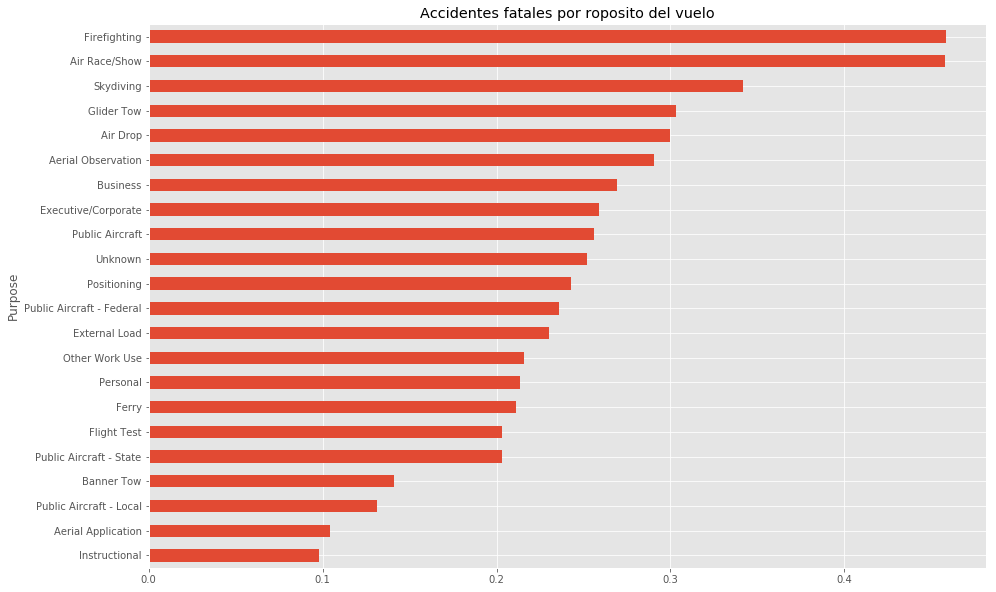

In [91]:
p7 =Injuries_by_purpose.apply(lambda r: r/r.sum(), axis = 1).sort_values(by=["Fatal"])["Fatal"].plot.barh(
    figsize = (15,10), title = "Accidentes fatales por roposito del vuelo") 

<img src="https://cbsnews3.cbsistatic.com/hub/i/r/2017/07/17/e58da6b8-0321-46d6-8eda-8870e22aff86/thumbnail/1200x630/de527f7f1e1871a799a8588547be119c/0717-ctm-supertankerdebate-strassman-1356174-640x360.jpg" width="50%" height="50%" >

<h4>3.4 ¿Cuál es la aeronave que más siniestros tiene?</h4>

Con los datos que tenemos en nuestro data frame, podemos fácilmente deducir cuál es el fabricante y el modelo más susceptible de tener un accidente:

In [92]:
# De nuevo usamos lambda junto con apply, esta vez para pasar todo a Mayúsculas, ya que hay fabricantes 
# escritos en Mayúscula y minúsculas y no se reconocían como únicos

Aircraft_types = vuelos[["AircraftCategory", "Model", "Make", "InjurySeverity",
                   "Engines", "EngineType" ]].apply(lambda x: x.astype(str).str.upper())

by_model = pd.crosstab(index = Aircraft_types["Model"], columns = Aircraft_types["InjurySeverity"], margins = True)
by_make = pd.crosstab(index = Aircraft_types["Make"], columns = Aircraft_types["InjurySeverity"], margins = True)

# Cogemos el Top 10 con head y ordenamos con sort

Top_10_Make = by_make.sort_values("All", ascending=False).drop("All").head(10)
Top_10_Model = by_model.sort_values("All", ascending=False).drop("All").head(10)

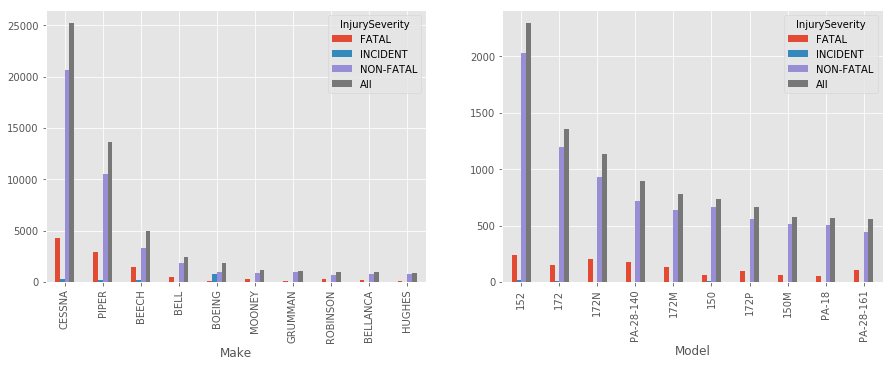

In [93]:
# De nuevo, emplemaos la misma técnica para imprimir dos gráficos en la misma salida

fig, axs = plt.subplots(1,2)
p8 = Top_10_Make.plot.bar(ax = axs[0], figsize = (15,5))
p9 = Top_10_Model.plot.bar(ax = axs[1])

Comovemos, el más sinestrado es el CESSNA - 152:

<img src="https://upload.wikimedia.org/wikipedia/commons/3/31/Cessna.fa152.aerobat.oo-lvj.arp.jpg" width="50%" height="50%" >

https://www.google.es/search?ei=IZdrWqejNMHbU_WuvbAM&q=cessna+152+aircraft+accidents&oq=cessna+152+aircraft+accidents&gs_l=psy-ab.3..35i39k1l2.25055.27028.0.27356.8.8.0.0.0.0.93.594.7.7.0....0...1c.1.64.psy-ab..1.7.594...33i21k1j33i160k1.0.F9j2xyS4Wk4

Vemos también que, en procentaje y por goleada, el tipo de areonave más siniestrada es el aeroplano, seguida del helicóptero:

In [94]:
100 * Aircraft_types.AircraftCategory.value_counts() / len(vuelos.InvestigationType)

AIRPLANE             79.965904
UNKNOWN              10.934975
HELICOPTER            8.373939
GYROCRAFT             0.226460
GLIDER                0.141220
WEIGHT-SHIFT          0.109413
POWERED PARACHUTE     0.078879
BALLOON               0.069974
ULTRALIGHT            0.047073
GYROPLANE             0.038167
BLIMP                 0.008906
POWERED-LIFT          0.003817
ROCKET                0.001272
Name: AircraftCategory, dtype: float64

<h4>3.5 Relación entre variables, ¿Existe alguna relacióndel tipo de accidente y el número de motores?</h4>

La siguiente gráfica de correlación ha sido obtenida basándonos en el tutorial de kaggel:
<br>
<br>
https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial
<br>
<br>
Podemos obvservar que existe cierta correlación entre los motores y el número de personas ilesas:

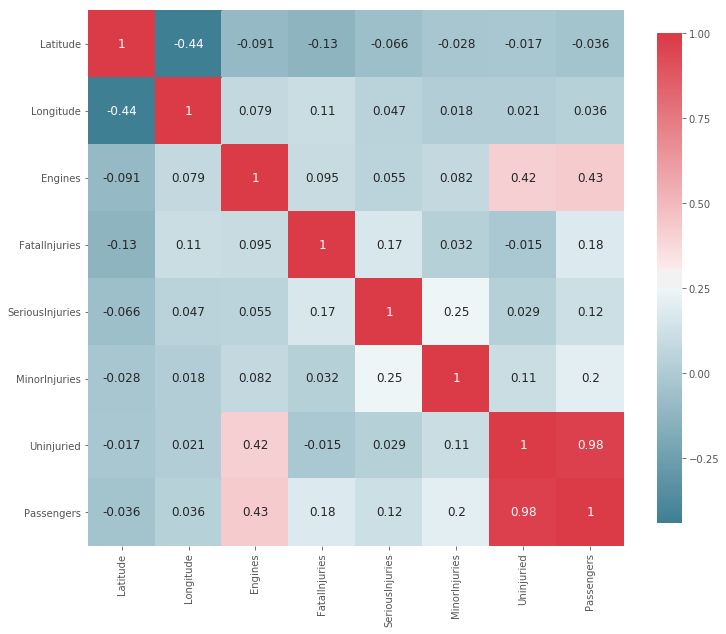

In [95]:
plot_correlation_map(vuelos)

InjurySeverity,Fatal,Incident,Non-Fatal
Engines,,,
1.0,27.4%,2.2%,70.4%
2.0,23.8%,22.6%,53.6%
3.0,7.0%,55.5%,37.6%
4.0,12.9%,46.7%,40.4%


InjurySeverity,Fatal,Incident,Non-Fatal
Engines,,,
1.0,3236,260,8325
2.0,1404,1330,3156
3.0,35,279,189
4.0,52,188,163


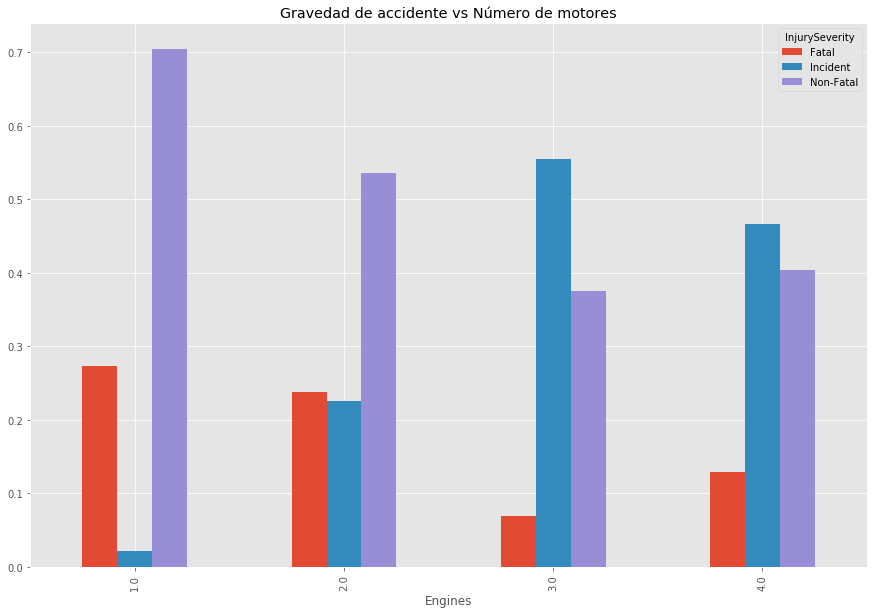

In [96]:
Engines = pd.crosstab(index=vuelos[(vuelos.Passengers > 2)].Engines,columns = 
                      vuelos.InjurySeverity)

display(Engines.apply(lambda r: r/r.sum(), axis = 1).style.format("{:.1%}"))

display(Engines)

p10 = Engines.apply(lambda r: r/r.sum(), axis = 1).plot.bar(figsize = (15,10), 
                                                            title = "Gravedad de accidente vs Número de motores")

Como vemos, la proporción de Incidentes a medida que va aumentando el número crece mientras que los accidentes decrecen, por lo que podemos concluir que varios motores adicionales ayudan a evitar el siniestro, como era de esperar.

<h3> 4. Evolución y análisis de fechas de siniestros</h3>
<h4>4.1 ¿Cuál ha sido la evolución en número de accidentes en los últimos años?</h4>

In [97]:
accdate = pd.crosstab(index=vuelos.EventDate.dt.year, columns = vuelos["InjurySeverity"])
p_accdate = accdate.apply(lambda r: r/r.sum(), axis = 1)
p_accdate = p_accdate.drop(p_accdate.index[[0,1,2,3,4,5]])
accdate["Total"] = accdate["Fatal"] + accdate["Incident"] + accdate["Non-Fatal"]
accdate = accdate.drop(accdate.index[[0,1,2,3,4,5]])
accdate

InjurySeverity,Fatal,Incident,Non-Fatal,Total
EventDate,,,,
1982,647,119,2746,3512
1983,647,137,2688,3472
1984,619,132,2634,3385
1985,564,99,2376,3039
1986,519,86,2205,2810
1987,503,112,2156,2771
1988,492,132,2016,2640
1989,492,86,1922,2500
1990,502,64,1874,2440


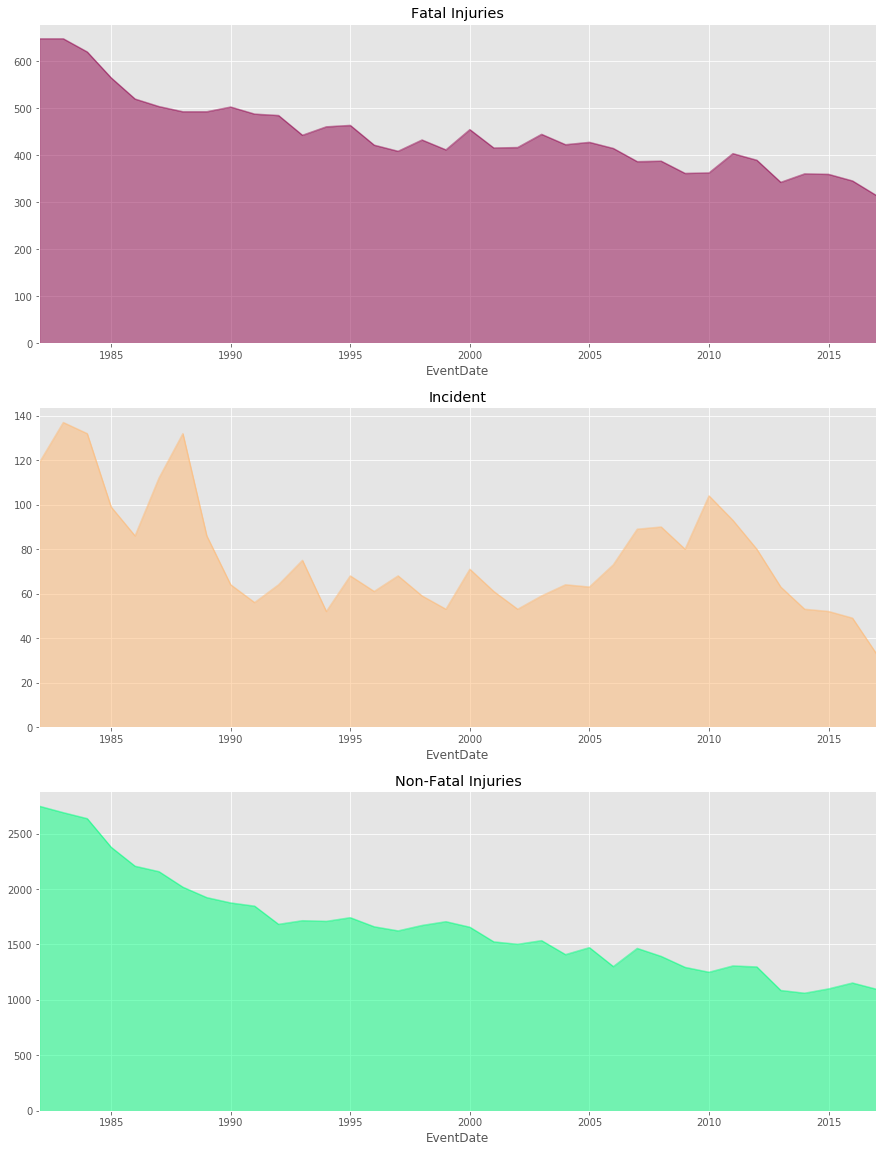

In [98]:
fig, axs = plt.subplots(3,1)

p11 = accdate.Fatal.plot.area(ax = axs[0], figsize = (15,20), 
                              color = "#90044D", alpha = 0.5,title = "Fatal Injuries")

p12 = accdate.Incident.plot.area(ax = axs[1], figsize = (15,20), 
                                 color = "#FFB973", alpha = 0.5,title = "Incident")

p13 = accdate["Non-Fatal"].plot.area(ax = axs[2], figsize = (15,20), 
                                     color = "#00FF7F", alpha = 0.5, title = "Non-Fatal Injuries")

Como vemos, el númoro de accidentes viene decreciendo cada vez más a lo largo del tiempo.

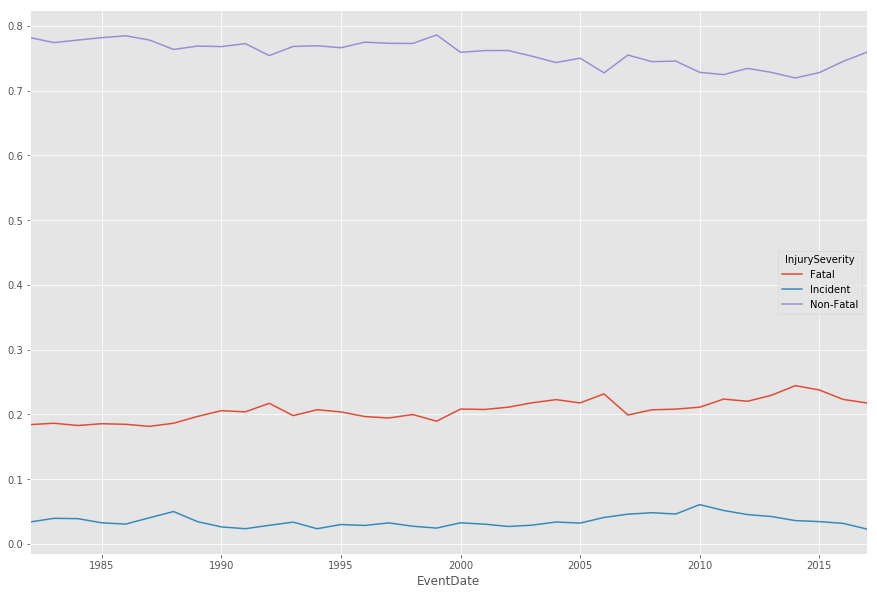

In [99]:
p14 = p_accdate.plot(figsize = (15, 10))

como curiosidad, la proporición entre los accidentes fatales, no fatales e incidentes, se mantiene constante a lo largo del tiempo

In [100]:
# Vamos ahora a usar otra técnica para resumir datos, primero nos quedaremos con las variables de fecha y número de tripulantes,
# las demás no las vamos a necesitar.

accdate_global = vuelos[["EventDate", "Passengers"]]

# Ahora, vamos a extraer de la columna con formato datetime, el año el mes y el día, y los vamos a dejar en 3 nuevas variables

accdate_global = accdate_global.assign(Year = accdate_global.EventDate.dt.year)
accdate_global = accdate_global.assign(Month = accdate_global.EventDate.dt.month)
accdate_global = accdate_global.assign(Day = accdate_global.EventDate.dt.day)

# Como los datos anteriores a 1982 son outliers y no nos hacen mostar bien los resultados (como vimos anterior mente hay un 
# solo accidente en los años anteriores), descartamos estas filas.

accdate_global = accdate_global[accdate_global['Year'] >= 1982]

# Ahora, vamos a nombrar los meses, de nuevo con apply + lambda apollándonos de la libreria calendar, de igual modo, vamos a 
# combrobar el día de la semana en el que sucedió el accidente.

accdate_global.Month = accdate_global.Month.apply(lambda x: calendar.month_abbr[x])
accdate_global =  accdate_global.assign(Weekday = accdate_global.EventDate.dt.weekday_name)

# Ahora, ordenemos los días y los meses. para poder representarlos de forma adecuada, nos apoyaremos en Categrical
# para esta acción

accdate_global["Weekday"] = pd.Categorical(accdate_global["Weekday"], 
                                           categories=['Monday','Tuesday','Wednesday','Thursday','Friday',
                                                       'Saturday', 'Sunday'], ordered=True)

accdate_global["Month"] = pd.Categorical(accdate_global["Month"], 
                                           categories=['Jan','Feb','Mar','Apr','May','Jun', 'Jul', 'Aug', 
                                                       'Sep', 'Oct',  'Nov', 'Dec'  ], ordered=True)

# Ahora con la funcinalidad que nos da la tabla dinámica de pandas podemos congtar los tripulantes accidentados por años y meses.

pivot_accdate = accdate_global.pivot_table(values = "Passengers", index= "Month", 
                                           columns = "Year", aggfunc = "count")

pivot_accdate

Year,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Month,,,,,,,,,,,,,,,,,,,,,
Jan,206,193,186,170,176,151,159,166,146,134,...,97,95,90,108,74,82,83,90,93,84
Feb,227,207,239,187,162,174,187,134,141,135,...,120,108,91,115,105,98,72,75,82,97
Mar,275,258,258,256,245,211,186,204,184,186,...,134,128,136,133,133,119,108,129,101,103
Apr,295,268,249,267,234,280,207,200,211,189,...,164,151,141,147,136,106,114,98,116,112
May,378,315,336,291,281,224,256,237,251,243,...,191,164,158,157,188,153,148,136,140,141
Jun,337,381,377,316,318,291,243,241,267,257,...,207,191,187,195,182,172,177,160,187,143
Jul,420,403,373,371,305,320,311,299,280,326,...,205,221,194,234,219,164,178,179,180,213
Aug,391,416,383,340,309,280,316,267,290,262,...,234,199,209,201,214,169,167,182,167,150
Sep,323,325,323,266,220,271,220,251,239,213,...,160,163,173,173,183,137,151,146,156,143


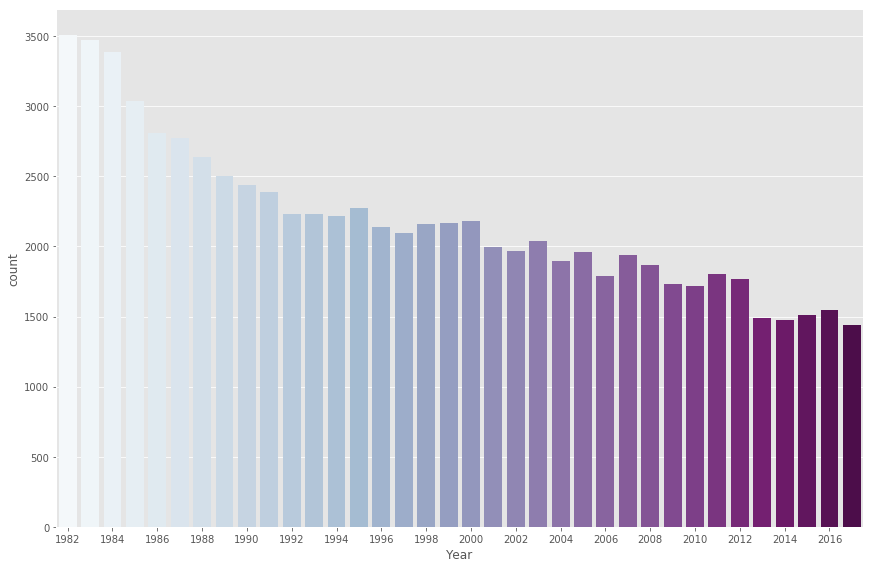

In [101]:
years = np.arange(1982, 2018)

p15 = sns.factorplot(x = "Year", data = accdate_global, kind="count", 
                     palette="BuPu", size=8, aspect=1.5, order=years)

p15 = p15.set_xticklabels(step=2) 

Por último, el gráfico resumen del total de los accidentes.

<h4>4.2 Relación entre el accidente y las fechas (meses y días de la semana)</h4>

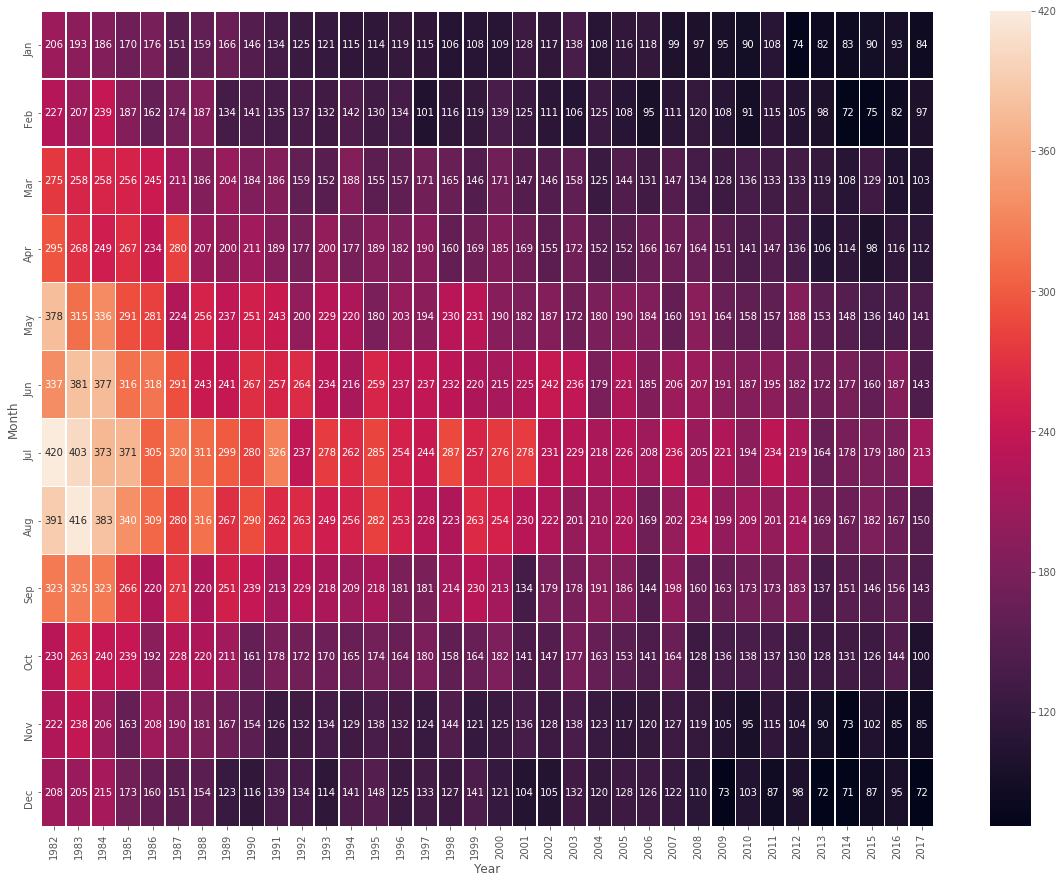

In [102]:
# Usaremos seaborn para representar los datos de la tabla anterior en modo de heatmap.

f, ax = plt.subplots(figsize=(20, 15))
p16 = sns.heatmap(pivot_accdate, annot=True, fmt="d", linewidths=.5, ax=ax)

Fijémonos en el mapa de calor sperior, en el observamos lo ya visto anteriormente, el decrecimiento de los accidentes a lo largo de los años. De igual modo, podemos observar cómo los meses de verano, son más propensos a tener accidentes que el resto en todos los años siendo el mes de Julio el más afectado.

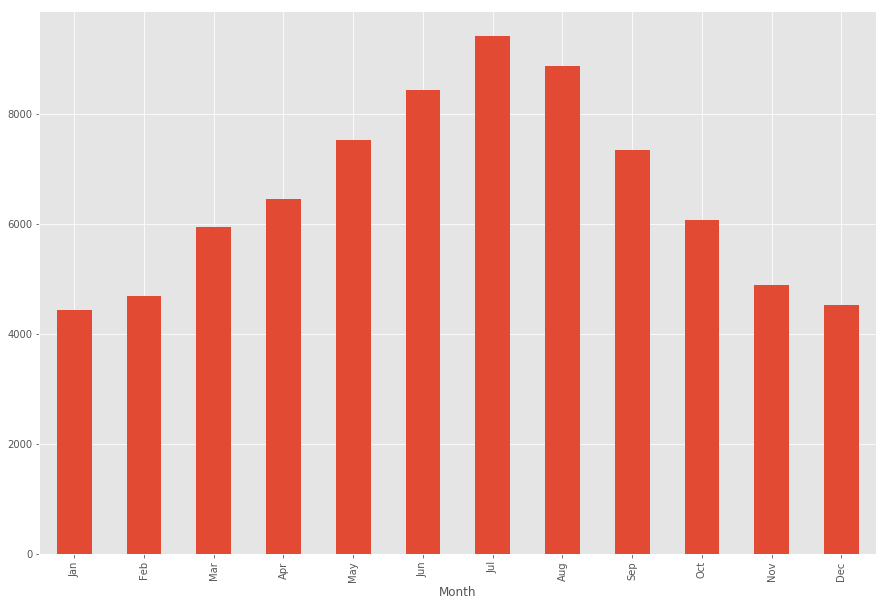

In [103]:
p17 = accdate_global.groupby("Month")["Passengers"].agg("count").plot.bar(figsize=(15,10))

En la gráfica superior observamos mejor lo que comnenábamos en el mapa de calor.

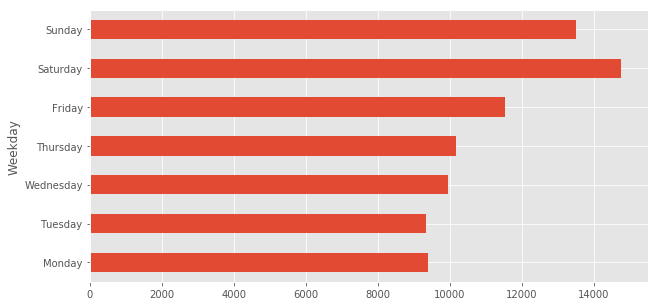

In [104]:
p18 = accdate_global.groupby("Weekday")["Passengers"].agg("count").plot.barh(figsize=(10,5))

Si hacemos un análisis por días, vemos que es el fin de semana, y más concretamente el sábado, cuántos más accidentes se producen.

<h3> 5. ¿En que fase del vuelo es más probable el accidente?¿Cómo influyen las condiciones climatológicas?</h3>

In [105]:
Phase = vuelos.PhaseOfFlight.value_counts()/len(vuelos.PhaseOfFlight)*100

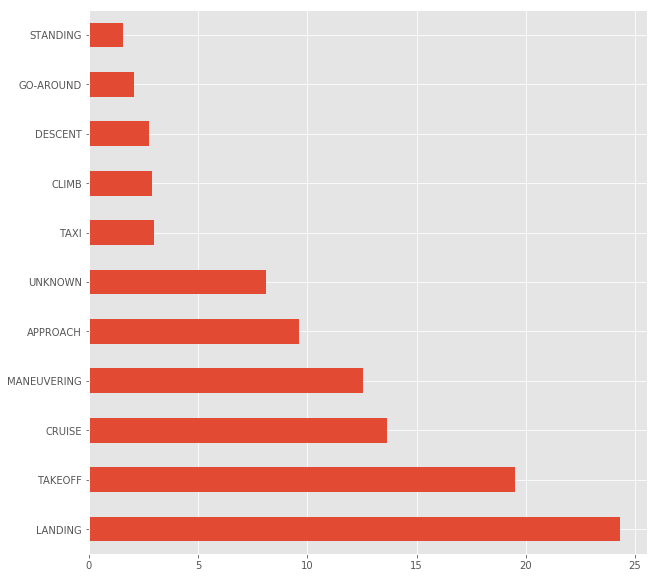

In [106]:
p19 = Phase.plot.barh(figsize = (10,10))

In [107]:
Phase_p = pd.crosstab(index=vuelos.PhaseOfFlight,columns = vuelos.InjurySeverity).apply(
    lambda r: r/r.sum(), axis = 1).sort_values("Fatal", ascending = False)*100

Phase_p

InjurySeverity,Fatal,Incident,Non-Fatal
PhaseOfFlight,,,
UNKNOWN,42.658109,7.420163,49.921728
MANEUVERING,39.462202,0.497210,60.040589
CLIMB,30.650155,9.155241,60.194604
CRUISE,27.681822,3.734479,68.583699
DESCENT,25.824431,5.434278,68.741291
APPROACH,25.533324,3.325825,71.140851
GO-AROUND,21.367521,1.343101,77.289377
TAKEOFF,15.470837,3.023786,81.505376
STANDING,10.327869,8.278689,81.393443


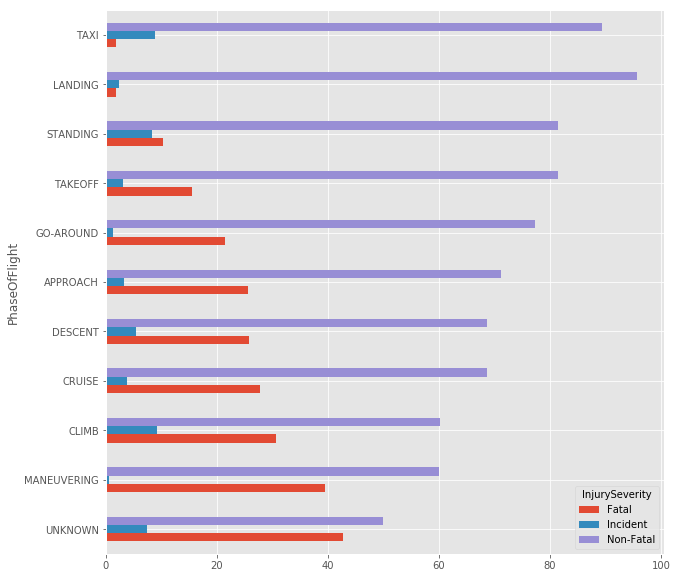

In [108]:
p20 = Phase_p.plot.barh(figsize=(10,10))

<img src="http://aviationweek.com/site-files/aviationweek.com/files/uploads/2014/12/PED_phase_flight.jpg" width="100%" height="100%" >

Como podemos observar, la fase en la que más accidentes ourren es en el aterrizaje sin embargo, en la que los siniestros suelen tener mas gravedad y heridos fatales son en la fase de maniobras.

In [109]:
vuelos.Weather.value_counts()/len(vuelos.Weather)*100

VMC    89.229145
IMC     7.253088
UNK     3.517767
Name: Weather, dtype: float64

En cuanto a las condiciones climatológicas, vemos que se producen más accidentes e VMC:
<br> https://www.thebalance.com/definition-vmc-and-imc-282942
<br>
En proporción sin embargo, están prácticamente al 50 %:

InjurySeverity,Fatal,Incident,Non-Fatal
Weather,,,
IMC,58.042449,4.244869,37.712682
UNK,52.766727,16.311031,30.922242
VMC,16.013403,2.937193,81.049405


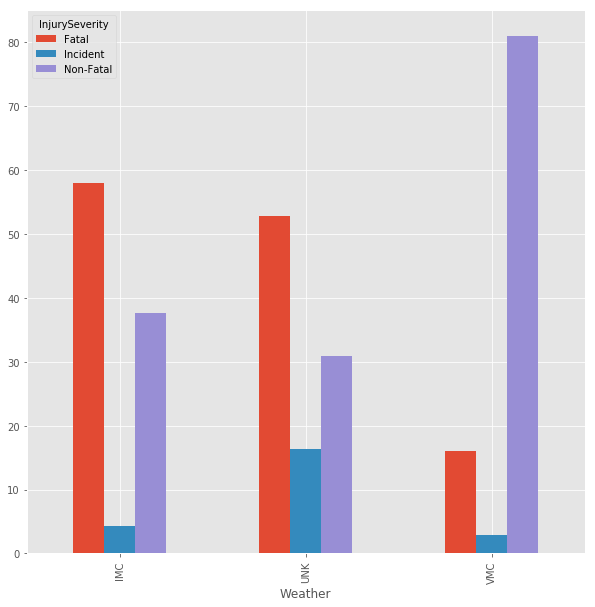

In [110]:
Weather = pd.crosstab(index=vuelos.Weather,columns = vuelos.InjurySeverity).apply(
    lambda r: r/r.sum(), axis = 1).sort_values("Fatal", ascending = False)*100

display(Weather)

p21 = Weather.plot.bar(figsize = (10,10))

<h3>6. Conclusiones finales y puntos de mejora</h3>

Se ha tratado en el análisis de usar todas las funciones vistas en la asignatura, usra varias librerías de gráficos y hacer un análisis lo mas completo posible.

Por lta de tiempo n se ha podido profundizar más en aspectos como las ubicaciones y mapas o cálculos estadísicos más complejos (como podría haber sido la predicción de accidentes para los próximos años)

